In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/ST 4057 /heart_2022_no_nans.csv'

In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_update.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
data_update.duplicated().sum()

9

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5294,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
86986,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87371,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
136874,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
174878,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data_copy = data_update.copy()
data_copy = data_update.drop_duplicates()
data_copy

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()
data_copy3 = data_copy.copy()

In [ ]:
numerical_cols = data_copy1.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy1[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07
...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28
246018,0.0,7.0,7.0,1.93,90.72,24.34
246019,0.0,15.0,7.0,1.68,83.91,29.86
246020,2.0,2.0,7.0,1.70,83.01,28.66


In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,0
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,0
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
categorical_cols = data_copy1.select_dtypes(include=['object','category']).columns

#TabNET


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols:
    le = LabelEncoder()
    data_copy1[col] = le.fit_transform(data_copy1[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy1.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
# Step 2: Separate features and target
target = "HeartConditionBinary"
features = [col for col in data_copy1.columns if col != target]

X = data_copy1[features].values
y = data_copy1[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (172209, 38) (172209,)
Validation set shape: (36902, 38) (36902,)
Test set shape: (36902, 38) (36902,)


In [ ]:
# Step 4: Confirm data types
print(f"X_train: {type(X_train)}, dtype: {X_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(y_train)}, dtype: {y_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


In [ ]:
print(X_train[:5])

[[ 23.     0.     2.     7.     0.     3.     0.     7.     0.     0.
    0.     0.     0.     0.     0.     1.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     1.     4.     9.     1.63 108.86
   41.2    0.     0.     0.     0.     3.     0.     0.  ]
 [ 17.     0.     2.     0.    15.     1.     1.     8.     3.     0.
    0.     0.     0.     1.     0.     1.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     0.     4.     9.     1.65 113.4
   41.6    1.     0.     0.     1.     0.     0.     2.  ]
 [ 27.     1.     4.     0.     0.     3.     1.     7.     3.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     0.     4.     8.     1.7   77.11
   26.63   1.     0.     1.     1.     2.     0.     0.  ]
 [ 22.     0.     4.     2.     1.     3.     1.     7.     3.     0.
    0.     1.     0.     0.     0.     1.     0.     0.     0.     0.
    1.     0.     0.     2.     0.     1.     4.

In [ ]:
cat_idxs

[0,
 1,
 2,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [ ]:
# Initialize variables to track the best validation AUC and training accuracy
best_valid_auc = 0
best_train_auc = 0
best_model_params = None  # To store best model weights

In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
# Train the TabNet model for 100 epochs
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=500,  # Train for 500 epochs
    patience=50,  # Allow early stopping after 75 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    weights={0: 1, 1: 10.38},  # Adjust weights for imbalance
    num_workers=0,
    drop_last=False,
)

epoch 0  | loss: 0.52596 | train_auc: 0.84584 | valid_auc: 0.84331 |  0:00:26s
epoch 1  | loss: 0.48312 | train_auc: 0.85039 | valid_auc: 0.8482  |  0:01:05s
epoch 2  | loss: 0.47645 | train_auc: 0.8534  | valid_auc: 0.84697 |  0:01:30s
epoch 3  | loss: 0.47197 | train_auc: 0.85537 | valid_auc: 0.84742 |  0:01:52s
epoch 4  | loss: 0.46934 | train_auc: 0.85794 | valid_auc: 0.84513 |  0:02:28s
epoch 5  | loss: 0.4644  | train_auc: 0.85973 | valid_auc: 0.84386 |  0:02:46s
epoch 6  | loss: 0.46148 | train_auc: 0.86187 | valid_auc: 0.84609 |  0:03:05s
epoch 7  | loss: 0.45986 | train_auc: 0.86324 | valid_auc: 0.84486 |  0:03:24s
epoch 8  | loss: 0.45586 | train_auc: 0.86431 | valid_auc: 0.84109 |  0:03:43s
epoch 9  | loss: 0.45426 | train_auc: 0.86539 | valid_auc: 0.84305 |  0:04:02s
epoch 10 | loss: 0.45095 | train_auc: 0.86628 | valid_auc: 0.84023 |  0:04:22s
epoch 11 | loss: 0.45073 | train_auc: 0.86633 | valid_auc: 0.83921 |  0:04:42s
epoch 12 | loss: 0.4457  | train_auc: 0.86871 | vali

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


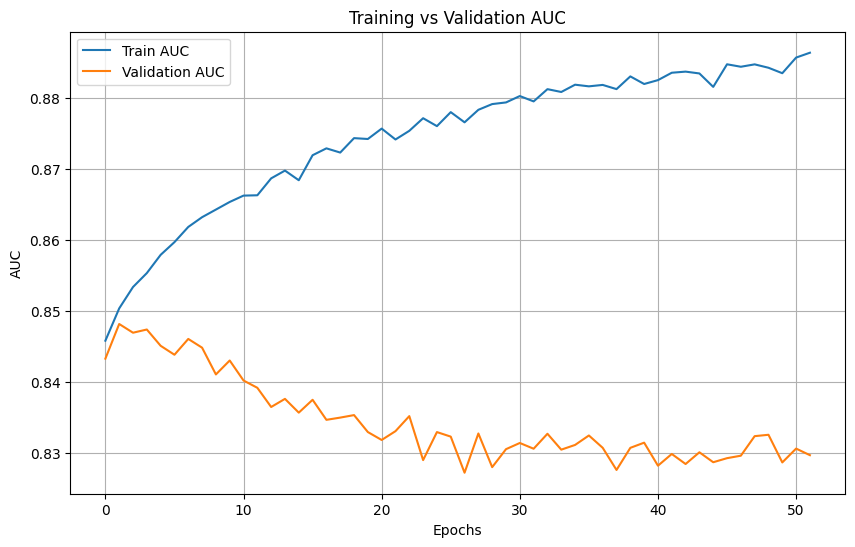

In [ ]:
# PLOT TRAINING AND VALIDATION AUC
plt.figure(figsize=(10, 6))
plt.plot(clf.history["train_auc"], label="Train AUC")
plt.plot(clf.history["valid_auc"], label="Validation AUC")
plt.title("Training vs Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Retrieve the best validation and training AUC from history
best_valid_auc = max(clf.history["valid_auc"])
best_train_auc = max(clf.history["train_auc"])

print(f"Best Validation AUC: {best_valid_auc}")
print(f"Best Training AUC: {best_train_auc}")

Best Validation AUC: 0.8481957513351479
Best Training AUC: 0.8864085544251707


In [ ]:
# Evaluate the model on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.81     33661
           1       0.21      0.84      0.34      3241

    accuracy                           0.71     36902
   macro avg       0.59      0.77      0.57     36902
weighted avg       0.91      0.71      0.77     36902

AUC-ROC Score: 0.8442
Confusion Matrix:
[[23451 10210]
 [  533  2708]]


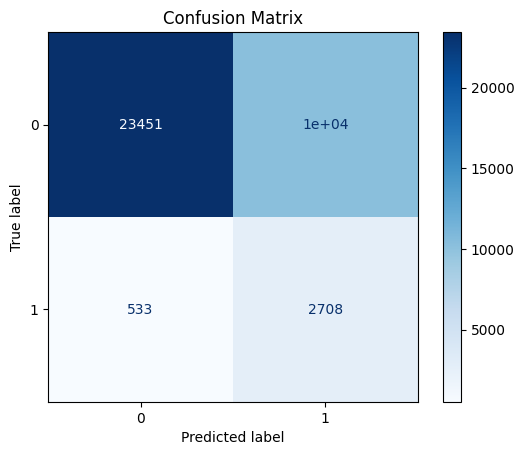

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    # Suggest hyperparameters including stronger regularization
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)  # Higher gamma for more regularization
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)  # Adding weight decay

    # Initialize TabNet with the suggested hyperparameters
    clf1 = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,  # Reduced embedding size for regularization
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr, "weight_decay": weight_decay},  # Weight decay as dropout alternative
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,  # Sparsemax or entmax controls the sparsity of attention
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model
    clf1.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Maximum number of epochs for tuning
        patience=20,  # Early stopping
        batch_size=batch_size,
        virtual_batch_size=128,
        weights={0: 1, 1: 10.38},  # Adjust weights for imbalance
        num_workers=0,
        drop_last=False,
    )

    # Evaluate on the validation set
    preds_valid = clf1.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    valid_auc = roc_auc_score(y_valid, preds_valid)  # Compute AUC

    return valid_auc  # Optuna will maximize this value



In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")  # Maximize AUC
study.optimize(objective, n_trials=1)  # Perform  trials

# Output the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-01-03 08:17:45,706] A new study created in memory with name: no-name-30fea322-8950-46fb-8be9-6438915de79f
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.51387 | valid_auc: 0.84777 |  0:00:28s
epoch 1  | loss: 0.48255 | valid_auc: 0.85011 |  0:00:50s
epoch 2  | loss: 0.48027 | valid_auc: 0.85046 |  0:01:11s
epoch 3  | loss: 0.48026 | valid_auc: 0.84619 |  0:01:32s
epoch 4  | loss: 0.47948 | valid_auc: 0.84825 |  0:01:55s
epoch 5  | loss: 0.47683 | valid_auc: 0.84954 |  0:02:26s
epoch 6  | loss: 0.47686 | valid_auc: 0.84915 |  0:02:47s
epoch 7  | loss: 0.47811 | valid_auc: 0.84802 |  0:03:09s
epoch 8  | loss: 0.47724 | valid_auc: 0.85078 |  0:03:31s
epoch 9  | loss: 0.47493 | valid_auc: 0.84911 |  0:03:52s
epoch 10 | loss: 0.47664 | valid_auc: 0.85115 |  0:04:15s
epoch 11 | loss: 0.47772 | valid_auc: 0.85055 |  0:04:37s
epoch 12 | loss: 0.47624 | valid_auc: 0.84957 |  0:04:58s
epoch 13 | loss: 0.47738 | valid_auc: 0.8515  |  0:05:20s
epoch 14 | loss: 0.47408 | valid_auc: 0.84954 |  0:05:41s
epoch 15 | loss: 0.47451 | valid_auc: 0.84934 |  0:06:02s
epoch 16 | loss: 0.4764  | valid_auc: 0.84827 |  0:06:23s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-03 08:30:43,620] Trial 0 finished with value: 0.8514974622722672 and parameters: {'cat_emb_dim': 7, 'learning_rate': 0.0176485663510717, 'gamma': 0.841459268568459, 'step_size': 61, 'mask_type': 'entmax', 'batch_size': 256, 'weight_decay': 6.832809547768884e-05}. Best is trial 0 with value: 0.8514974622722672.


Best hyperparameters: {'cat_emb_dim': 7, 'learning_rate': 0.0176485663510717, 'gamma': 0.841459268568459, 'step_size': 61, 'mask_type': 'entmax', 'batch_size': 256, 'weight_decay': 6.832809547768884e-05}
Best validation AUC: 0.8514974622722672


In [ ]:
best_params = study.best_params

clf_best = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={
        "lr": best_params["learning_rate"],
        "weight_decay": best_params["weight_decay"]  # Added weight decay here
    },
    scheduler_params={
        "step_size": best_params["step_size"],
        "gamma": best_params["gamma"]
    },
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

clf_best.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_valid, y_valid), (X_test, y_test),(X_train, y_train)],  # Evaluate on both validation and test sets
    eval_name=["valid", "test", "train"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for more epochs with the best hyperparameters
    patience=10,
    batch_size=best_params["batch_size"],
    virtual_batch_size=128,
    weights={0: 1, 1: 10.38},
    num_workers=0,
    drop_last=False,
)

# Evaluate on the test set
preds_test = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, preds_test)
print("Test AUC:", test_auc)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.51387 | valid_auc: 0.84777 | test_auc: 0.84597 | train_auc: 0.84887 |  0:00:42s
epoch 1  | loss: 0.48201 | valid_auc: 0.85026 | test_auc: 0.84678 | train_auc: 0.8511  |  0:01:15s
epoch 2  | loss: 0.47985 | valid_auc: 0.84635 | test_auc: 0.84393 | train_auc: 0.84727 |  0:01:48s
epoch 3  | loss: 0.48    | valid_auc: 0.84586 | test_auc: 0.84313 | train_auc: 0.84706 |  0:02:22s
epoch 4  | loss: 0.47899 | valid_auc: 0.84907 | test_auc: 0.84591 | train_auc: 0.84978 |  0:02:55s
epoch 5  | loss: 0.47701 | valid_auc: 0.85036 | test_auc: 0.84699 | train_auc: 0.85007 |  0:03:27s
epoch 6  | loss: 0.47776 | valid_auc: 0.8498  | test_auc: 0.84578 | train_auc: 0.8496  |  0:04:00s
epoch 7  | loss: 0.47761 | valid_auc: 0.84954 | test_auc: 0.848   | train_auc: 0.85113 |  0:04:33s
epoch 8  | loss: 0.47753 | valid_auc: 0.85095 | test_auc: 0.84733 | train_auc: 0.85101 |  0:05:05s
epoch 9  | loss: 0.47542 | valid_auc: 0.85109 | test_auc: 0.84783 | train_auc: 0.85207 |  0:05:39s
epoch 10 |

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test AUC: 0.848862399673841


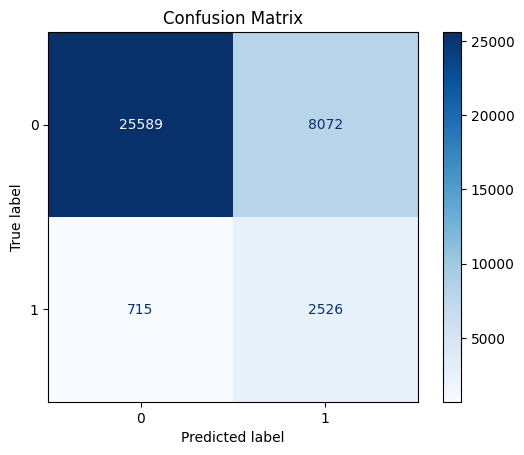

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     33661
           1       0.24      0.78      0.37      3241

    accuracy                           0.76     36902
   macro avg       0.61      0.77      0.61     36902
weighted avg       0.91      0.76      0.81     36902

Test AUC: 0.8489


In [ ]:
# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")

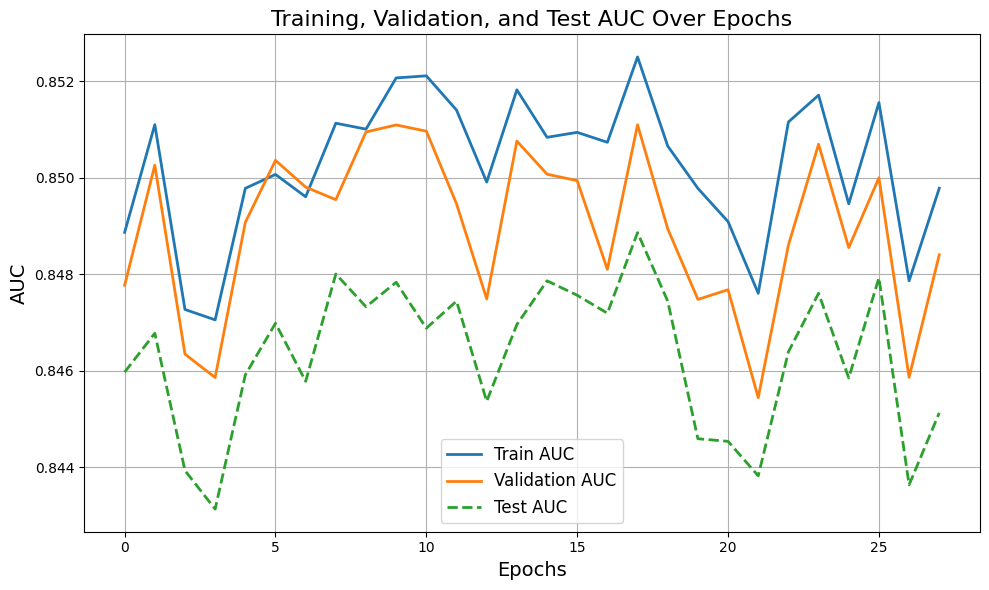

In [ ]:
# PLOT TRAINING, VALIDATION, AND TEST AUC
plt.figure(figsize=(10, 6))
plt.plot(clf_best.history["train_auc"], label="Train AUC", linewidth=2)
plt.plot(clf_best.history["valid_auc"], label="Validation AUC", linewidth=2)
plt.plot(clf_best.history["test_auc"], label="Test AUC", linewidth=2, linestyle='--')

# Plot Settings
plt.title("Training, Validation, and Test AUC Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Global Feature Importance (Values):
State: 0.0000
Sex: 0.0674
GeneralHealth: 0.1231
PhysicalHealthDays: 0.0000
MentalHealthDays: 0.0000
LastCheckupTime: 0.0000
PhysicalActivities: 0.6010
SleepHours: 0.0000
RemovedTeeth: 0.0000
HadStroke: 0.0000
HadAsthma: 0.0000
HadSkinCancer: 0.0000
HadCOPD: 0.0413
HadDepressiveDisorder: 0.0000
HadKidneyDisease: 0.0000
HadArthritis: 0.0000
HadDiabetes: 0.0000
DeafOrHardOfHearing: 0.0000
BlindOrVisionDifficulty: 0.0000
DifficultyConcentrating: 0.0000
DifficultyWalking: 0.0000
DifficultyDressingBathing: 0.0000
DifficultyErrands: 0.0000
SmokerStatus: 0.0000
ECigaretteUsage: 0.0000
ChestScan: 0.0000
RaceEthnicityCategory: 0.0000
AgeCategory: 0.0000
HeightInMeters: 0.0000
WeightInKilograms: 0.0000
BMI: 0.0000
AlcoholDrinkers: 0.0000
HIVTesting: 0.0000
FluVaxLast12: 0.0000
PneumoVaxEver: 0.1672
TetanusLast10Tdap: 0.0000
HighRiskLastYear: 0.0000
CovidPos: 0.0000


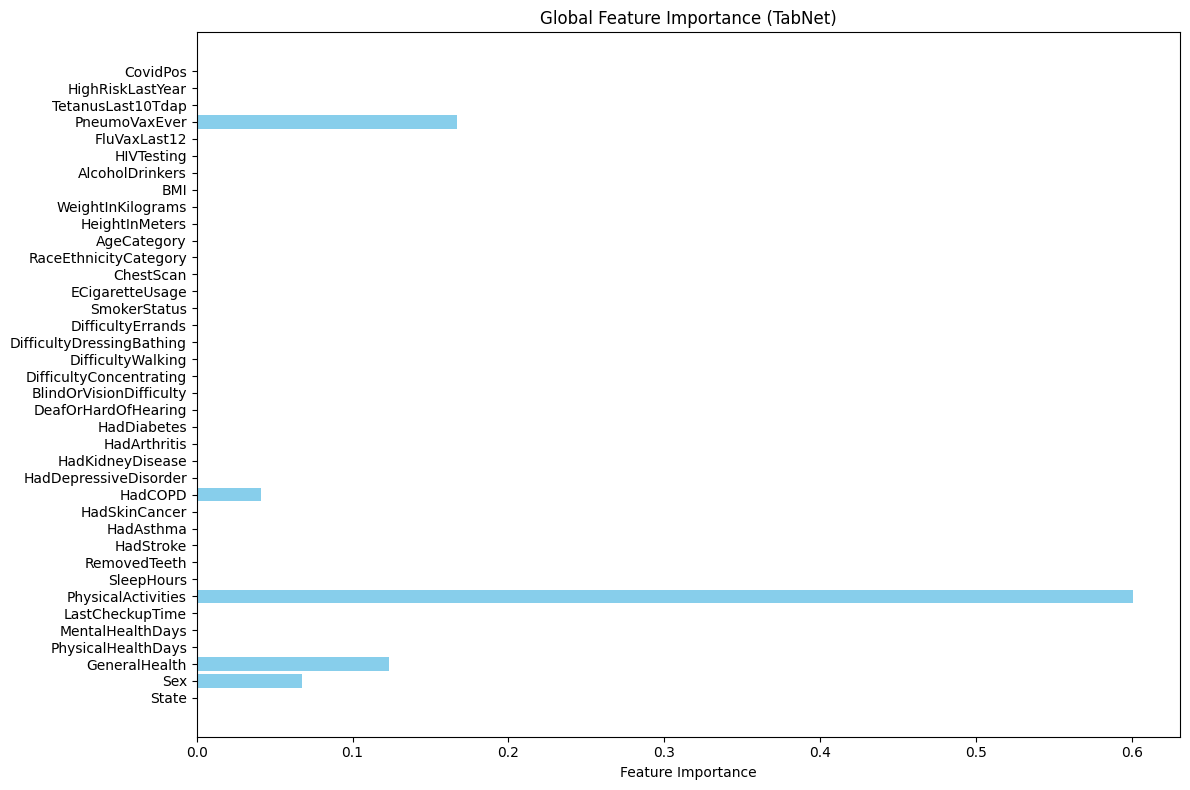

In [ ]:
# GLOBAL FEATURE IMPORTANCE with values
global_importance = clf_best.feature_importances_

# Displaying feature importance values
print("Global Feature Importance (Values):")
for feature, importance in zip(features, global_importance):
    print(f"{feature}: {importance:.4f}")

# Plotting global feature importance
plt.figure(figsize=(12, 8))
plt.barh(features, global_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Global Feature Importance (TabNet)")
plt.tight_layout()
plt.show()


In [ ]:
# GLOBAL FEATURE IMPORTANCE
global_importance = clf_best.feature_importances_
print("Global Feature Importance:")
for idx, importance in enumerate(global_importance):
    print(f"Feature {features[idx]}: {importance:.4f}")

Global Feature Importance:
Feature State: 0.0000
Feature Sex: 0.0674
Feature GeneralHealth: 0.1231
Feature PhysicalHealthDays: 0.0000
Feature MentalHealthDays: 0.0000
Feature LastCheckupTime: 0.0000
Feature PhysicalActivities: 0.6010
Feature SleepHours: 0.0000
Feature RemovedTeeth: 0.0000
Feature HadStroke: 0.0000
Feature HadAsthma: 0.0000
Feature HadSkinCancer: 0.0000
Feature HadCOPD: 0.0413
Feature HadDepressiveDisorder: 0.0000
Feature HadKidneyDisease: 0.0000
Feature HadArthritis: 0.0000
Feature HadDiabetes: 0.0000
Feature DeafOrHardOfHearing: 0.0000
Feature BlindOrVisionDifficulty: 0.0000
Feature DifficultyConcentrating: 0.0000
Feature DifficultyWalking: 0.0000
Feature DifficultyDressingBathing: 0.0000
Feature DifficultyErrands: 0.0000
Feature SmokerStatus: 0.0000
Feature ECigaretteUsage: 0.0000
Feature ChestScan: 0.0000
Feature RaceEthnicityCategory: 0.0000
Feature AgeCategory: 0.0000
Feature HeightInMeters: 0.0000
Feature WeightInKilograms: 0.0000
Feature BMI: 0.0000
Feature Alco


Local Feature Importance (Sample View):
Sample 1:
State: 0.0000
Sex: 0.0000
GeneralHealth: 0.1257
PhysicalHealthDays: 0.0000
MentalHealthDays: 0.0000
LastCheckupTime: 0.0000
PhysicalActivities: 2.9549
SleepHours: 0.0000
RemovedTeeth: 0.0000
HadStroke: 0.0000
HadAsthma: 0.0000
HadSkinCancer: 0.0000
HadCOPD: 0.0000
HadDepressiveDisorder: 0.0000
HadKidneyDisease: 0.0000
HadArthritis: 0.0000
HadDiabetes: 0.0000
DeafOrHardOfHearing: 0.0000
BlindOrVisionDifficulty: 0.0000
DifficultyConcentrating: 0.0000
DifficultyWalking: 0.0000
DifficultyDressingBathing: 0.0000
DifficultyErrands: 0.0000
SmokerStatus: 0.0000
ECigaretteUsage: 0.0000
ChestScan: 0.0000
RaceEthnicityCategory: 0.0000
AgeCategory: 0.0000
HeightInMeters: 0.0000
WeightInKilograms: 0.0000
BMI: 0.0000
AlcoholDrinkers: 0.0000
HIVTesting: 0.0000
FluVaxLast12: 0.0000
PneumoVaxEver: 0.5461
TetanusLast10Tdap: 0.0000
HighRiskLastYear: 0.0000
CovidPos: 0.0000


Sample 2:
State: 0.0000
Sex: 0.0000
GeneralHealth: 0.4191
PhysicalHealthDays: 0.

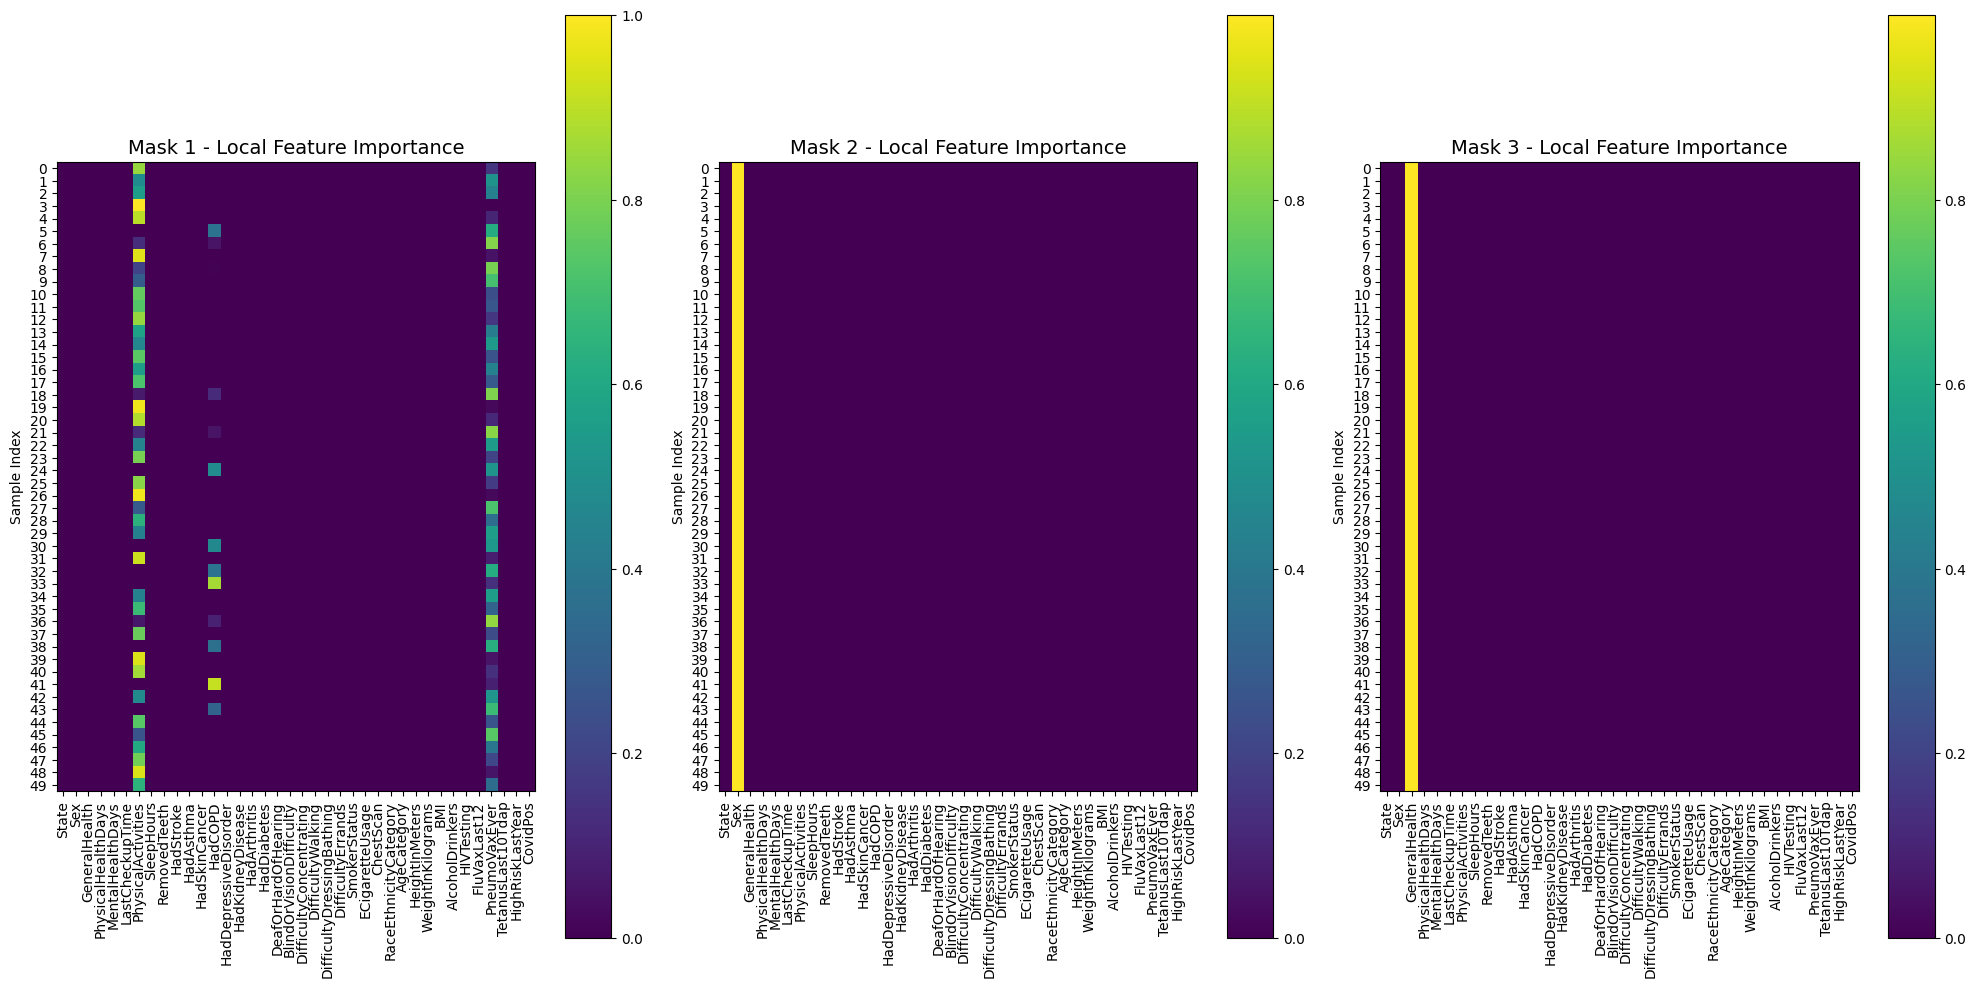

In [ ]:
# LOCAL FEATURE IMPORTANCE
# Explain test data and retrieve masks for local importance
explain_matrix, masks = clf_best.explain(X_test)

# Display local feature importance for the first 5 samples
print("\nLocal Feature Importance (Sample View):")
for i in range(20):
    print(f"Sample {i+1}:")
    for feature, importance in zip(features, explain_matrix[i]):
        print(f"{feature}: {importance:.4f}")
    print("\n")

# Visualizing the local feature importance using masks
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for i in range(3):
    im = axs[i].imshow(masks[i][:50])  # Display for the first 50 samples
    axs[i].set_title(f"Mask {i+1} - Local Feature Importance", fontsize=14)
    axs[i].set_xticks(range(len(features)))
    axs[i].set_xticklabels(features, rotation=90)
    axs[i].set_yticks(range(50))
    axs[i].set_ylabel("Sample Index")
    fig.colorbar(im, ax=axs[i])

plt.tight_layout()
plt.show()


In [ ]:
# LOCAL FEATURE IMPORTANCE
explain_matrix, masks = clf_best.explain(X_test)  # Explain on test data
print("Local Feature Importance (Sample View):")
print(explain_matrix[:20])  # Display feature importance for the first 20 samples

Local Feature Importance (Sample View):
[[6.64728594e-09 1.19431631e-06 1.25701334e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.95486924e+00 0.00000000e+00
  7.16349480e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.18036165e-08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.29747027e-10 0.00000000e+00 0.00000000e+00 1.02126637e-08
  1.05876463e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.46059310e-01 0.00000000e+00
  0.00000000e+00 2.18209797e-10]
 [2.56059092e-08 4.03239864e-06 4.19089850e-01 0.00000000e+00
  0.00000000e+00 1.11782359e-10 5.93779966e-01 0.00000000e+00
  2.74534067e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.39007408e-08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

# RF & TabNET

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
data_copy3

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_copy3['HeartConditionBinary'] = ((data_copy3['HadHeartAttack'] == 'Yes') | (data_copy3['HadAngina'] == 'Yes')).astype(int)
data_copy3 = data_copy3.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy3

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,0
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,Yes,...,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,0
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0


In [ ]:
categorical_cols3 = data_copy3.select_dtypes(include=['object','category']).columns
categorical_cols3

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numerical_cols3 = data_copy3.select_dtypes(include=['float64','number']).columns
numerical_cols3

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HeartConditionBinary'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cat_idxs = []
cat_dims = []

label_encoders = {}

for col in categorical_cols3:
    le = LabelEncoder()
    data_copy3[col] = le.fit_transform(data_copy3[col].astype(str))
    label_encoders[col] = le
    #cat_idxs.append(data_copy3.columns.get_loc(col))  # Store column index
    #cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
target = "HeartConditionBinary"
features = [col for col in data_copy3.columns if col != target]

X3 = data_copy3[features]
y3 = data_copy3[target]

X_train, X_temp, y_train, y_temp = train_test_split(X3, y3, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
rf = RandomForestClassifier(class_weight="balanced", random_state=10)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [ ]:
sorted_indices = np.argsort(feature_importances)[::-1]
num_selected_features = int(len(features) * 0.85)
selected_features = sorted_indices[:num_selected_features]

X_train_selected = X_train.iloc[:, selected_features]
X_valid_selected = X_valid.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

selected_feature_names = X_train_selected.columns

In [ ]:
categorical_indices = [selected_feature_names.get_loc(col) for col in categorical_cols3 if col in selected_feature_names]
numerical_indices = [i for i in range(len(selected_feature_names)) if i not in categorical_indices]

num_features = X_train_selected.shape[1]  # Get the number of features

# Ensure categorical indices are valid
cat_idxs = [idx for idx in categorical_indices if idx < num_features]

cat_dims = [X_train_selected.iloc[:, idx].nunique() for idx in categorical_indices]
print("Categorical dimensions:", cat_dims)

print("Categorical indices:", categorical_indices)


# Convert categorical columns to int64 and numerical columns to float32
for idx in categorical_indices:
    X_train_selected.iloc[:, idx] = X_train_selected.iloc[:, idx].astype(np.int64)
    X_valid_selected.iloc[:, idx] = X_valid_selected.iloc[:, idx].astype(np.int64)
    X_test_selected.iloc[:, idx] = X_test_selected.iloc[:, idx].astype(np.int64)

for idx in numerical_indices:
    X_train_selected.iloc[:, idx] = X_train_selected.iloc[:, idx].astype(np.float32)
    X_valid_selected.iloc[:, idx] = X_valid_selected.iloc[:, idx].astype(np.float32)
    X_test_selected.iloc[:, idx] = X_test_selected.iloc[:, idx].astype(np.float32)

# Convert target to NumPy arrays
y_train_np = y_train.values
y_valid_np = y_valid.values
y_test_np = y_test.values


Categorical dimensions: [54, 2, 5, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 5, 13, 2, 2, 2, 2, 4, 3]
Categorical indices: [3, 18, 6, 22, 27, 8, 17, 31, 23, 30, 29, 12, 15, 28, 14, 16, 25, 2, 19, 0, 20, 26, 24, 10, 11, 21]


In [ ]:
X_train_selected

,AgeCategory,BMI,ChestScan,State,WeightInKilograms,HeightInMeters,GeneralHealth,PhysicalHealthDays,RemovedTeeth,SleepHours,...,LastCheckupTime,HadCOPD,FluVaxLast12,ECigaretteUsage,HIVTesting,PhysicalActivities,DeafOrHardOfHearing,HadKidneyDisease,HadDepressiveDisorder,HadAsthma
100540,9,41.200001,1,23,108.860001,1.63,2,7.0,0,7.0,...,3,0,0,0,0,0,0,0,0,0
70231,9,41.599998,0,17,113.400002,1.65,2,0.0,3,8.0,...,1,0,0,0,0,1,0,0,1,0
123172,8,26.629999,0,27,77.110001,1.70,4,0.0,3,7.0,...,3,0,1,0,0,1,0,0,0,0
95168,11,38.970001,1,22,99.790001,1.60,4,2.0,3,7.0,...,3,0,0,0,0,1,0,0,0,0
232700,11,26.629999,0,52,74.839996,1.68,4,0.0,3,7.0,...,3,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93556,9,30.680000,0,21,99.790001,1.80,4,0.0,0,8.0,...,3,0,0,0,0,1,0,0,0,0
181573,5,29.049999,1,42,81.650002,1.68,1,0.0,1,8.0,...,3,0,0,1,0,1,0,0,0,0
94738,10,19.580000,0,22,56.700001,1.70,0,0.0,3,8.0,...,3,0,1,0,0,1,0,0,0,0
236678,9,24.410000,0,52,81.650002,1.83,2,0.0,0,7.0,...,3,1,1,1,0,1,0,0,0,1


#no csl


In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=X_train_selected.values,
    y_train=y_train_np,
    eval_set=[(X_train_selected.values, y_train_np), (X_valid_selected.values, y_valid_np)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test_selected.values)
y_prob = clf.predict_proba(X_test_selected.values)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test_np, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test_np, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test_np, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test_np, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test_np, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test_np, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test_np, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test_np, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

# Training accuracy
y_train_pred = clf.predict(X_train_selected.values)
train_accuracy = accuracy_score(y_train_np, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.26342 | train_auc: 0.81875 | valid_auc: 0.81542 |  0:00:33s
epoch 1  | loss: 0.24038 | train_auc: 0.83504 | valid_auc: 0.8334  |  0:00:52s
epoch 2  | loss: 0.23253 | train_auc: 0.8477  | valid_auc: 0.84667 |  0:01:11s
epoch 3  | loss: 0.22963 | train_auc: 0.85018 | valid_auc: 0.84983 |  0:01:30s
epoch 4  | loss: 0.22901 | train_auc: 0.85041 | valid_auc: 0.84981 |  0:01:50s
epoch 5  | loss: 0.22879 | train_auc: 0.85089 | valid_auc: 0.85012 |  0:02:11s
epoch 6  | loss: 0.22761 | train_auc: 0.85195 | valid_auc: 0.85099 |  0:02:31s
epoch 7  | loss: 0.22739 | train_auc: 0.852   | valid_auc: 0.85031 |  0:02:50s
epoch 8  | loss: 0.22748 | train_auc: 0.8498  | valid_auc: 0.84793 |  0:03:09s
epoch 9  | loss: 0.22693 | train_auc: 0.85322 | valid_auc: 0.85177 |  0:03:28s
epoch 10 | loss: 0.22675 | train_auc: 0.85388 | valid_auc: 0.85213 |  0:03:46s
epoch 11 | loss: 0.22645 | train_auc: 0.85374 | valid_auc: 0.85124 |  0:04:06s
epoch 12 | loss: 0.22596 | train_auc: 0.85485 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       0.914557        0.914639             0.919642          0.993108   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.954964              0.57971          0.098735   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.168732       0.848629  


# CSL


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

weights_list = [
    {0: 1, 1: 10.38},  # IR
    {0: (1/10.38), 1: 1},      # CUSTOM WITH IR
    {0:0.009086077881960733, 1:0.9909139221180393},      # ICF
    {0: 0.036161107438907734, 1: 0.9638388925610922}       # LICF
]

# Initialize an empty list to store results
results = []

# Loop through all the weights and train the model for each
for weights in weights_list:
    # Train the model with current weights
    clf.fit(
    X_train=X_train_selected.values,
    y_train=y_train_np,
    eval_set=[(X_train_selected.values, y_train_np), (X_valid_selected.values, y_valid_np)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
   )

    # Generate predictions
    y_pred_csl = clf.predict(X_test_selected.values)
    y_prob_csl = clf.predict_proba(X_test_selected.values)[:, 1]

    # Test accuracy
    test_accuracy = accuracy_score(y_test_np, y_pred_csl)

    # Calculate precision, recall, and F1 score for both classes (0 and 1)
    precision_class_0 = precision_score(y_test_np, y_pred_csl, pos_label=0)
    recall_class_0 = recall_score(y_test_np, y_pred_csl, pos_label=0)
    f1_class_0 = f1_score(y_test_np, y_pred_csl, pos_label=0)

    precision_class_1 = precision_score(y_test_np, y_pred_csl, pos_label=1)
    recall_class_1 = recall_score(y_test_np, y_pred_csl, pos_label=1)
    f1_class_1 = f1_score(y_test_np, y_pred_csl, pos_label=1)

    # AUC-ROC score
    auc_score = roc_auc_score(y_test_np, y_prob_csl)

    # Confusion matrix
    cm = confusion_matrix(y_test_np, y_pred_csl)

    # Training accuracy
    y_train_pred_csl = clf.predict(X_train_selected.values)
    train_accuracy = accuracy_score(y_train_np, y_train_pred_csl)

    # Store the results
    results.append({
        'Weight Set': str(weights),
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Precision (Class 0)': precision_class_0,
        'Recall (Class 0)': recall_class_0,
        'F1 Score (Class 0)': f1_class_0,
        'Precision (Class 1)': precision_class_1,
        'Recall (Class 1)': recall_class_1,
        'F1 Score (Class 1)': f1_class_1,
        'AUC-ROC Score': auc_score
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.26342 | train_auc: 0.81875 | valid_auc: 0.81542 |  0:00:20s
epoch 1  | loss: 0.24038 | train_auc: 0.83504 | valid_auc: 0.8334  |  0:00:39s
epoch 2  | loss: 0.23253 | train_auc: 0.8477  | valid_auc: 0.84667 |  0:01:00s
epoch 3  | loss: 0.22963 | train_auc: 0.85018 | valid_auc: 0.84983 |  0:01:18s
epoch 4  | loss: 0.22901 | train_auc: 0.85041 | valid_auc: 0.84981 |  0:01:38s
epoch 5  | loss: 0.22879 | train_auc: 0.85089 | valid_auc: 0.85012 |  0:01:57s
epoch 6  | loss: 0.22761 | train_auc: 0.85195 | valid_auc: 0.85099 |  0:02:17s
epoch 7  | loss: 0.22739 | train_auc: 0.852   | valid_auc: 0.85031 |  0:02:36s
epoch 8  | loss: 0.22748 | train_auc: 0.8498  | valid_auc: 0.84793 |  0:02:55s
epoch 9  | loss: 0.22693 | train_auc: 0.85322 | valid_auc: 0.85177 |  0:03:14s
epoch 10 | loss: 0.22675 | train_auc: 0.85388 | valid_auc: 0.85213 |  0:03:33s
epoch 11 | loss: 0.22645 | train_auc: 0.85374 | valid_auc: 0.85124 |  0:03:52s
epoch 12 | loss: 0.22596 | train_auc: 0.85485 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.26342 | train_auc: 0.81875 | valid_auc: 0.81542 |  0:00:19s
epoch 1  | loss: 0.24038 | train_auc: 0.83504 | valid_auc: 0.8334  |  0:00:38s
epoch 2  | loss: 0.23253 | train_auc: 0.8477  | valid_auc: 0.84667 |  0:00:57s
epoch 3  | loss: 0.22963 | train_auc: 0.85018 | valid_auc: 0.84983 |  0:01:16s
epoch 4  | loss: 0.22901 | train_auc: 0.85041 | valid_auc: 0.84981 |  0:01:35s
epoch 5  | loss: 0.22879 | train_auc: 0.85089 | valid_auc: 0.85012 |  0:01:54s
epoch 6  | loss: 0.22761 | train_auc: 0.85195 | valid_auc: 0.85099 |  0:02:14s
epoch 7  | loss: 0.22739 | train_auc: 0.852   | valid_auc: 0.85031 |  0:02:32s
epoch 8  | loss: 0.22748 | train_auc: 0.8498  | valid_auc: 0.84793 |  0:02:52s
epoch 9  | loss: 0.22693 | train_auc: 0.85322 | valid_auc: 0.85177 |  0:03:10s
epoch 10 | loss: 0.22675 | train_auc: 0.85388 | valid_auc: 0.85213 |  0:03:30s
epoch 11 | loss: 0.22645 | train_auc: 0.85374 | valid_auc: 0.85124 |  0:03:48s
epoch 12 | loss: 0.22596 | train_auc: 0.85485 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.26342 | train_auc: 0.81875 | valid_auc: 0.81542 |  0:00:19s
epoch 1  | loss: 0.24038 | train_auc: 0.83504 | valid_auc: 0.8334  |  0:00:37s
epoch 2  | loss: 0.23253 | train_auc: 0.8477  | valid_auc: 0.84667 |  0:00:57s
epoch 3  | loss: 0.22963 | train_auc: 0.85018 | valid_auc: 0.84983 |  0:01:15s
epoch 4  | loss: 0.22901 | train_auc: 0.85041 | valid_auc: 0.84981 |  0:01:35s
epoch 5  | loss: 0.22879 | train_auc: 0.85089 | valid_auc: 0.85012 |  0:01:53s
epoch 6  | loss: 0.22761 | train_auc: 0.85195 | valid_auc: 0.85099 |  0:02:36s
epoch 7  | loss: 0.22739 | train_auc: 0.852   | valid_auc: 0.85031 |  0:03:07s
epoch 8  | loss: 0.22748 | train_auc: 0.8498  | valid_auc: 0.84793 |  0:03:42s
epoch 9  | loss: 0.22693 | train_auc: 0.85322 | valid_auc: 0.85177 |  0:04:20s
epoch 10 | loss: 0.22675 | train_auc: 0.85388 | valid_auc: 0.85213 |  0:04:38s
epoch 11 | loss: 0.22645 | train_auc: 0.85374 | valid_auc: 0.85124 |  0:04:57s
epoch 12 | loss: 0.22596 | train_auc: 0.85485 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.26342 | train_auc: 0.81875 | valid_auc: 0.81542 |  0:00:18s
epoch 1  | loss: 0.24038 | train_auc: 0.83504 | valid_auc: 0.8334  |  0:00:45s
epoch 2  | loss: 0.23253 | train_auc: 0.8477  | valid_auc: 0.84667 |  0:01:21s
epoch 3  | loss: 0.22963 | train_auc: 0.85018 | valid_auc: 0.84983 |  0:01:56s
epoch 4  | loss: 0.22901 | train_auc: 0.85041 | valid_auc: 0.84981 |  0:02:35s
epoch 5  | loss: 0.22879 | train_auc: 0.85089 | valid_auc: 0.85012 |  0:03:12s
epoch 6  | loss: 0.22761 | train_auc: 0.85195 | valid_auc: 0.85099 |  0:03:54s
epoch 7  | loss: 0.22739 | train_auc: 0.852   | valid_auc: 0.85031 |  0:04:32s
epoch 8  | loss: 0.22748 | train_auc: 0.8498  | valid_auc: 0.84793 |  0:04:54s
epoch 9  | loss: 0.22693 | train_auc: 0.85322 | valid_auc: 0.85177 |  0:05:20s
epoch 10 | loss: 0.22675 | train_auc: 0.85388 | valid_auc: 0.85213 |  0:05:40s
epoch 11 | loss: 0.22645 | train_auc: 0.85374 | valid_auc: 0.85124 |  0:05:58s
epoch 12 | loss: 0.22596 | train_auc: 0.85485 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


                                         Weight Set  Test Accuracy  \
0                                  {0: 1, 1: 10.38}       0.914557   
1                    {0: 0.09633911368015413, 1: 1}       0.914557   
2  {0: 0.009086077881960733, 1: 0.9909139221180393}       0.914557   
3  {0: 0.036161107438907734, 1: 0.9638388925610922}       0.914557   

   Train Accuracy  Precision (Class 0)  Recall (Class 0)  F1 Score (Class 0)  \
0        0.914639             0.919642          0.993108            0.954964   
1        0.914639             0.919642          0.993108            0.954964   
2        0.914639             0.919642          0.993108            0.954964   
3        0.914639             0.919642          0.993108            0.954964   

   Precision (Class 1)  Recall (Class 1)  F1 Score (Class 1)  AUC-ROC Score  
0              0.57971          0.098735            0.168732       0.848629  
1              0.57971          0.098735            0.168732       0.848629  
2             

#SMOTE

In [ ]:
X1_train = X_train_selected.copy()
y1_train = y_train_np.copy()
X1_test = X_test_selected.copy()
y1_test = y_test_np.copy()
X1_valid = X_valid_selected.copy()
y1_valid = y_valid_np.copy()

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

In [ ]:
class_counts_train = Counter(y1_train)
y1_train_0 = class_counts_train[0]
y1_train_1 = class_counts_train[1]

print(f"Class 0 count train: {y1_train_0}")
print(f"Class 1 count train: {y1_train_1}")


class_counts_test = Counter(y1_test)
y1_test_0 = class_counts_test[0]
y1_test_1 = class_counts_test[1]

print(f"Class 0 count test: {y1_test_0}")
print(f"Class 1 count test: {y1_test_1}")

class_counts_valid = Counter(y1_valid)
y1_valid_0 = class_counts_test[0]
y1_valid_1 = class_counts_test[1]

print(f"Class 0 count test: {y1_valid_0}")
print(f"Class 1 count test: {y1_valid_1}")

Class 0 count train: 157134
Class 1 count train: 15075
Class 0 count test: 33661
Class 1 count test: 3241
Class 0 count test: 33661
Class 1 count test: 3241


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
Xs_train, ys_train = smote.fit_resample(X1_train, y1_train)

print("After SMOTE with Tomek Links:")
print("Original class distribution:", Counter(y1_train))
print("Resampled class distribution:", Counter(ys_train))

After SMOTE with Tomek Links:
Original class distribution: Counter({0: 157134, 1: 15075})
Resampled class distribution: Counter({0: 157134, 1: 157134})


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=Xs_train.values,
    y_train=ys_train,
    eval_set=[(Xs_train.values, ys_train), (X1_valid.values, y1_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred1 = clf.predict(X1_test.values)
y_prob1 = clf.predict_proba(X1_test.values)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y1_test, y_pred1)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y1_test, y_pred1, pos_label=0)
recall_class_0 = recall_score(y1_test, y_pred1, pos_label=0)
f1_class_0 = f1_score(y1_test, y_pred1, pos_label=0)

precision_class_1 = precision_score(y1_test, y_pred1, pos_label=1)
recall_class_1 = recall_score(y1_test, y_pred1, pos_label=1)
f1_class_1 = f1_score(y1_test, y_pred1, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y1_test, y_prob1)

# Confusion matrix
cm = confusion_matrix(y1_test, y_pred1)

# Training accuracy
y_train_pred1 = clf.predict(Xs_train.values)
train_accuracy = accuracy_score(ys_train, y_train_pred1)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.37139 | train_auc: 0.93616 | valid_auc: 0.77641 |  0:00:40s
epoch 1  | loss: 0.32479 | train_auc: 0.93964 | valid_auc: 0.77652 |  0:01:14s
epoch 2  | loss: 0.31997 | train_auc: 0.94159 | valid_auc: 0.77671 |  0:01:48s
epoch 3  | loss: 0.317   | train_auc: 0.94169 | valid_auc: 0.78328 |  0:02:22s
epoch 4  | loss: 0.31446 | train_auc: 0.94357 | valid_auc: 0.77314 |  0:02:56s
epoch 5  | loss: 0.31209 | train_auc: 0.94394 | valid_auc: 0.76859 |  0:03:30s
epoch 6  | loss: 0.31048 | train_auc: 0.94424 | valid_auc: 0.76843 |  0:04:05s
epoch 7  | loss: 0.3085  | train_auc: 0.94487 | valid_auc: 0.78469 |  0:04:39s
epoch 8  | loss: 0.30684 | train_auc: 0.94579 | valid_auc: 0.78684 |  0:05:12s
epoch 9  | loss: 0.30552 | train_auc: 0.9452  | valid_auc: 0.77292 |  0:05:46s
epoch 10 | loss: 0.30352 | train_auc: 0.94488 | valid_auc: 0.76666 |  0:06:20s
epoch 11 | loss: 0.30227 | train_auc: 0.94587 | valid_auc: 0.77068 |  0:06:53s
epoch 12 | loss: 0.29967 | train_auc: 0.83839 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       0.828925        0.869879             0.938213          0.869731   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.902675             0.230432          0.405122   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.293769       0.783541  


# CSL AND TUNNED old code





In [ ]:
!pip install pytorch-tabnet
!pip install optuna

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import optuna

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("lr", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])

    # Initialize TabNet
    clf = TabNetClassifier(
        cat_idxs=categorical_indices,
        cat_dims=[len(label_encoders[col].classes_) for col in categorical_cols3 if col in selected_feature_names],
        cat_emb_dim=cat_emb_dim,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train TabNet
    clf.fit(
        X_train=X_train_selected.values,
        y_train=y_train_np,
        eval_set=[(X_valid_selected.values, y_valid_np)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=100,
        patience=20,
        batch_size=batch_size,
        weights={0: 1, 1: 10.38},
        virtual_batch_size=64,
        num_workers=0,
        drop_last=False,
    )

    # Validation AUC
    preds = clf.predict_proba(X_valid_selected.values)[:, 1]
    auc = roc_auc_score(y_valid_np, preds)
    return auc

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1)


[I 2025-01-19 20:22:16,702] A new study created in memory with name: no-name-5d798808-9efe-4019-a7e7-7badc7f7e8f8
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5106  | valid_auc: 0.8505  |  0:00:22s
epoch 1  | loss: 0.48105 | valid_auc: 0.84969 |  0:00:38s
epoch 2  | loss: 0.47682 | valid_auc: 0.85034 |  0:00:55s
epoch 3  | loss: 0.47476 | valid_auc: 0.84623 |  0:01:11s
epoch 4  | loss: 0.47265 | valid_auc: 0.84942 |  0:01:29s
epoch 5  | loss: 0.4697  | valid_auc: 0.84825 |  0:01:45s
epoch 6  | loss: 0.46731 | valid_auc: 0.84668 |  0:02:01s
epoch 7  | loss: 0.46093 | valid_auc: 0.84502 |  0:02:16s
epoch 8  | loss: 0.45791 | valid_auc: 0.84218 |  0:02:32s
epoch 9  | loss: 0.45227 | valid_auc: 0.84335 |  0:02:48s
epoch 10 | loss: 0.45038 | valid_auc: 0.84065 |  0:03:04s
epoch 11 | loss: 0.44945 | valid_auc: 0.83924 |  0:03:20s
epoch 12 | loss: 0.44428 | valid_auc: 0.83545 |  0:03:35s
epoch 13 | loss: 0.44278 | valid_auc: 0.83748 |  0:03:51s
epoch 14 | loss: 0.4402  | valid_auc: 0.8385  |  0:04:07s
epoch 15 | loss: 0.43704 | valid_auc: 0.83666 |  0:04:22s
epoch 16 | loss: 0.43725 | valid_auc: 0.8344  |  0:04:39s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-19 20:28:14,755] Trial 0 finished with value: 0.8504956775660899 and parameters: {'cat_emb_dim': 9, 'lr': 0.03345436748911214, 'gamma': 0.9792694919712044, 'step_size': 29, 'mask_type': 'entmax', 'batch_size': 512}. Best is trial 0 with value: 0.8504956775660899.


In [ ]:
print("Best Parameters:", study.best_params)
print("Best Validation AUC:", study.best_value)

Best Parameters: {'cat_emb_dim': 9, 'lr': 0.03345436748911214, 'gamma': 0.9792694919712044, 'step_size': 29, 'mask_type': 'entmax', 'batch_size': 512}
Best Validation AUC: 0.8504956775660899


In [ ]:
clf = TabNetClassifier(
    cat_idxs=categorical_indices,
    cat_dims=[len(label_encoders[col].classes_) for col in categorical_cols3 if col in selected_feature_names],
    cat_emb_dim=study.best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={"lr": study.best_params["lr"]},
    scheduler_params={"step_size": study.best_params["step_size"], "gamma": study.best_params["gamma"]},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=study.best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

history = clf.fit(
    X_train=X_train_selected.values,
    y_train=y_train_np,
    eval_set=[(X_valid_selected.values, y_valid_np)],
    eval_name=["valid"],
    eval_metric=["auc"],
    max_epochs=100,
    patience=20,
    batch_size=study.best_params["batch_size"],
    weights={0: 1, 1: 10.38},
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False,
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5106  | valid_auc: 0.8505  |  0:00:23s
epoch 1  | loss: 0.48105 | valid_auc: 0.84969 |  0:00:39s
epoch 2  | loss: 0.47682 | valid_auc: 0.85034 |  0:00:58s
epoch 3  | loss: 0.47476 | valid_auc: 0.84623 |  0:01:22s
epoch 4  | loss: 0.47265 | valid_auc: 0.84942 |  0:01:37s
epoch 5  | loss: 0.4697  | valid_auc: 0.84825 |  0:01:53s
epoch 6  | loss: 0.46731 | valid_auc: 0.84668 |  0:02:08s
epoch 7  | loss: 0.46093 | valid_auc: 0.84502 |  0:02:24s
epoch 8  | loss: 0.45791 | valid_auc: 0.84218 |  0:02:41s
epoch 9  | loss: 0.45227 | valid_auc: 0.84335 |  0:02:56s
epoch 10 | loss: 0.45038 | valid_auc: 0.84065 |  0:03:12s
epoch 11 | loss: 0.44945 | valid_auc: 0.83924 |  0:03:27s
epoch 12 | loss: 0.44428 | valid_auc: 0.83545 |  0:03:43s
epoch 13 | loss: 0.44278 | valid_auc: 0.83748 |  0:03:59s
epoch 14 | loss: 0.4402  | valid_auc: 0.8385  |  0:04:15s
epoch 15 | loss: 0.43704 | valid_auc: 0.83666 |  0:04:31s
epoch 16 | loss: 0.43725 | valid_auc: 0.8344  |  0:04:46s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = clf.predict(X_test_selected.values)
pred_proba = clf.predict_proba(X_test_selected.values)[:, 1]


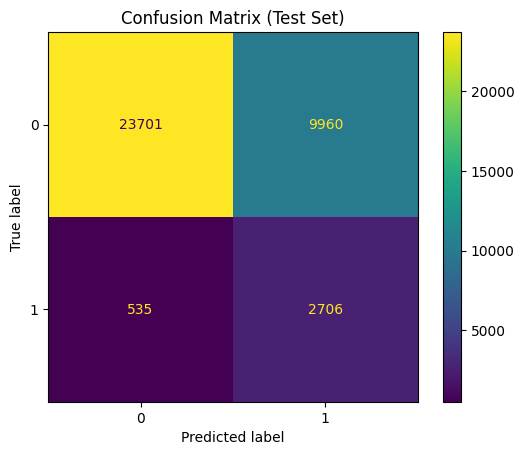

In [ ]:
cm = confusion_matrix(y_test_np, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [ ]:
auc_test = roc_auc_score(y_test_np, pred_proba)
print("Test AUC:", auc_test)


Test AUC: 0.8465618010440248


In [ ]:
report = classification_report(y_test_np, preds, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.70      0.82     33661
     Class 1       0.21      0.83      0.34      3241

    accuracy                           0.72     36902
   macro avg       0.60      0.77      0.58     36902
weighted avg       0.91      0.72      0.78     36902

